In [1]:
import numpy as np
from scipy.special import iv
import timeit
import viscid_mat
import imp
from scipy.linalg import eig
import matplotlib.pyplot as plt
import json

In [305]:
filebase='auto'
argsdict=json.load(open(filebase+'argsdict.json'))

In [95]:
f=np.loadtxt(filebase+'u.txt')
n = 2*(2*argsdict['Nx']+1)*(2*argsdict['Nt']+1)
v=(f[:n]+1j*f[n:2*n]).reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))
w=(f[2*n:3*n]+1j*f[3*n:4*n]).reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))
omega=f[4*n]+1j*f[4*n+1]
E_n=viscid_mat.viscid_mat(omega, argsdict)
dE=(viscid_mat.viscid_mat(omega+argsdict['domega_fd'],argsdict)-E_n)/argsdict['domega_fd']
np.einsum("kKlLmM,KLM,klm",E_n,v,w)/np.einsum("kKlLmM,KLM,klm",dE,v,w)

(-1.6057736796041126e-12-2.5667576668403287e-12j)

In [204]:
u=np.loadtxt(argsdict['filebase']+'u.txt')
n = 2*(2*argsdict['Nx']+1)*(2*argsdict['Nt']+1)
v=(u[:n]+1j*u[n:2*n]).reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))
w=(u[2*n:3*n]+1j*u[3*n:4*n]).reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))
omega=u[4*n]+1j*u[4*n+1]
print(omega)
E=viscid_mat.viscid_mat(omega, argsdict)
f1=np.einsum("kKlLmM,KLM",E,v)
f2=np.einsum("kKlLmM,klm",E,w)
n1=np.linalg.norm(v)**2-1
n2=np.linalg.norm(w)**2-1
f=np.concatenate([np.real(f1.reshape(np.product(f1.shape))),np.imag(f1.reshape(np.product(f1.shape))),np.real(f2.reshape(np.product(f2.shape))),np.imag(f2.reshape(np.product(f2.shape))),[n1],[n2]])

(11.840865572874625+1.8842967380433981j)


In [286]:
jac=np.zeros((4*n+2,4*n+2))
h=1e-8;

for ind in range(n):
    print(ind,n,end='\r')
    u=np.loadtxt(argsdict['filebase']+'u.txt')
    n = 2*(2*argsdict['Nx']+1)*(2*argsdict['Nt']+1)
    v=(u[:n]+1j*u[n:2*n]).reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))
    w=(u[2*n:3*n]+1j*u[3*n:4*n]).reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))

    v=v.reshape((n))
    v[ind]=v[ind]+h
    v=v.reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))

    omega=u[4*n]+1j*u[4*n+1]
    E=viscid_mat.viscid_mat(omega, argsdict)
    f1=np.einsum("kKlLmM,KLM",E,v)
    f2=np.einsum("kKlLmM,klm",E,w)
    n1=np.linalg.norm(v)**2-1
    n2=np.linalg.norm(w)**2-1
    f_fd=np.concatenate([np.real(f1.reshape(np.product(f1.shape))),np.imag(f1.reshape(np.product(f1.shape))),np.real(f2.reshape(np.product(f2.shape))),np.imag(f2.reshape(np.product(f2.shape))),[n1],[n2]])
    jac[ind]=(f_fd-f)/h
    
    u=np.loadtxt(argsdict['filebase']+'u.txt')
    n = 2*(2*argsdict['Nx']+1)*(2*argsdict['Nt']+1)
    v=(u[:n]+1j*u[n:2*n]).reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))
    w=(u[2*n:3*n]+1j*u[3*n:4*n]).reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))

    v=v.reshape((n))
    v[ind]=v[ind]+1j*h
    v=v.reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))

    omega=u[4*n]+1j*u[4*n+1]
    E=viscid_mat.viscid_mat(omega, argsdict)
    f1=np.einsum("kKlLmM,KLM",E,v)
    f2=np.einsum("kKlLmM,klm",E,w)
    n1=np.linalg.norm(v)**2-1
    n2=np.linalg.norm(w)**2-1
    f_fd=np.concatenate([np.real(f1.reshape(np.product(f1.shape))),np.imag(f1.reshape(np.product(f1.shape))),np.real(f2.reshape(np.product(f2.shape))),np.imag(f2.reshape(np.product(f2.shape))),[n1],[n2]])
    jac[n+ind]=(f_fd-f)/h

    u=np.loadtxt(argsdict['filebase']+'u.txt')
    n = 2*(2*argsdict['Nx']+1)*(2*argsdict['Nt']+1)
    v=(u[:n]+1j*u[n:2*n]).reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))
    w=(u[2*n:3*n]+1j*u[3*n:4*n]).reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))

    w=w.reshape((n))
    w[ind]=w[ind]+h
    w=w.reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))

    omega=u[4*n]+1j*u[4*n+1]
    E=viscid_mat.viscid_mat(omega, argsdict)
    f1=np.einsum("kKlLmM,KLM",E,v)
    f2=np.einsum("kKlLmM,klm",E,w)
    n1=np.linalg.norm(v)**2-1
    n2=np.linalg.norm(w)**2-1
    f_fd=np.concatenate([np.real(f1.reshape(np.product(f1.shape))),np.imag(f1.reshape(np.product(f1.shape))),np.real(f2.reshape(np.product(f2.shape))),np.imag(f2.reshape(np.product(f2.shape))),[n1],[n2]])
    jac[2*n+ind]=(f_fd-f)/h
    
    u=np.loadtxt(argsdict['filebase']+'u.txt')
    n = 2*(2*argsdict['Nx']+1)*(2*argsdict['Nt']+1)
    v=(u[:n]+1j*u[n:2*n]).reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))
    w=(u[2*n:3*n]+1j*u[3*n:4*n]).reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))

    w=w.reshape((n))
    w[ind]=w[ind]+1j*h
    w=w.reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))

    omega=u[4*n]+1j*u[4*n+1]
    E=viscid_mat.viscid_mat(omega, argsdict)
    f1=np.einsum("kKlLmM,KLM",E,v)
    f2=np.einsum("kKlLmM,klm",E,w)
    n1=np.linalg.norm(v)**2-1
    n2=np.linalg.norm(w)**2-1
    f_fd=np.concatenate([np.real(f1.reshape(np.product(f1.shape))),np.imag(f1.reshape(np.product(f1.shape))),np.real(f2.reshape(np.product(f2.shape))),np.imag(f2.reshape(np.product(f2.shape))),[n1],[n2]])
    jac[3*n+ind]=(f_fd-f)/h

h=1e-6;
u=np.loadtxt(argsdict['filebase']+'u.txt')
n = 2*(2*argsdict['Nx']+1)*(2*argsdict['Nt']+1)
v=(u[:n]+1j*u[n:2*n]).reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))
w=(u[2*n:3*n]+1j*u[3*n:4*n]).reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))

omega=u[4*n]+1j*u[4*n+1]+h
E=viscid_mat.viscid_mat(omega, argsdict)
f1=np.einsum("kKlLmM,KLM",E,v)
f2=np.einsum("kKlLmM,klm",E,w)
n1=np.linalg.norm(v)**2-1
n2=np.linalg.norm(w)**2-1
f_fd=np.concatenate([np.real(f1.reshape(np.product(f1.shape))),np.imag(f1.reshape(np.product(f1.shape))),np.real(f2.reshape(np.product(f2.shape))),np.imag(f2.reshape(np.product(f2.shape))),[n1],[n2]])
jac[4*n]=(f_fd-f)/h

omega=u[4*n]+1j*u[4*n+1]+1j*h
E=viscid_mat.viscid_mat(omega, argsdict)
f1=np.einsum("kKlLmM,KLM",E,v)
f2=np.einsum("kKlLmM,klm",E,w)
n1=np.linalg.norm(v)**2-1
n2=np.linalg.norm(w)**2-1
f_fd=np.concatenate([np.real(f1.reshape(np.product(f1.shape))),np.imag(f1.reshape(np.product(f1.shape))),np.real(f2.reshape(np.product(f2.shape))),np.imag(f2.reshape(np.product(f2.shape))),[n1],[n2]])
jac[4*n+1]=(f_fd-f)/h

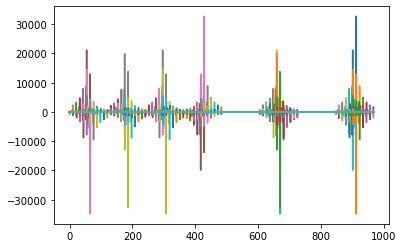

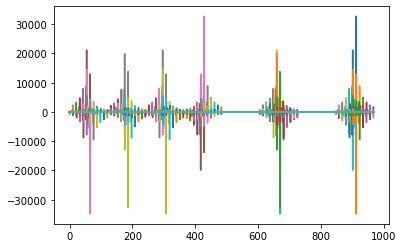

7.705480947812993e-08


In [287]:
J=np.loadtxt(argsdict['filebase']+'J.txt')

plt.plot(J)
plt.show()
plt.plot(jac)
plt.show()
print(np.linalg.norm(J-jac)/np.linalg.norm(jac))

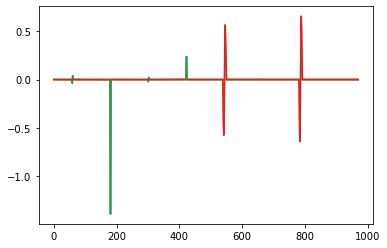

In [294]:
plt.plot(jac[:,-2:])
plt.plot(J[:,-2:])
plt.show()

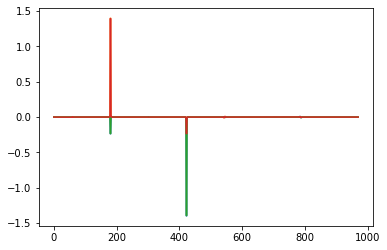

In [293]:
plt.plot(jac[-2:].T)
plt.plot(J[-2:].T)
plt.show()

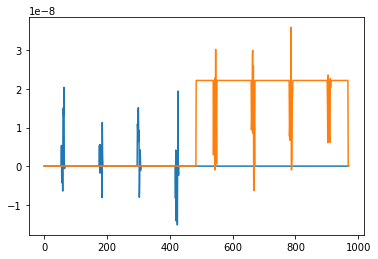

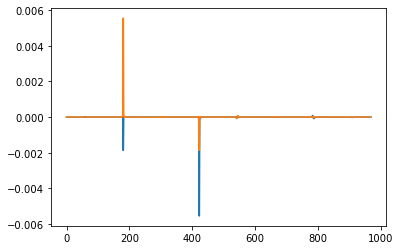

In [297]:
plt.plot(jac[:,-2:]-J[:,-2:])
plt.show()
plt.plot(jac[-2:].T-J[-2:].T)
plt.show()

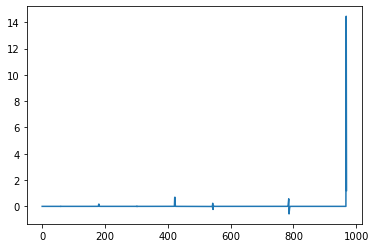

In [299]:
plt.plot(np.loadtxt('autou_0.txt'))

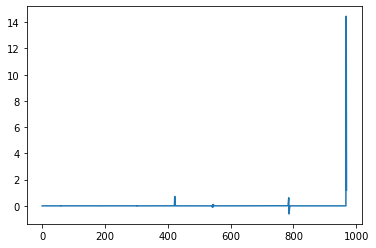

In [300]:
plt.plot(np.loadtxt('autou.txt'))

In [309]:
f=np.loadtxt(filebase+'u.txt')
n = 2*(2*argsdict['Nx']+1)*(2*argsdict['Nt']+1)
v=(f[:n]+1j*f[n:2*n]).reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))
w=(f[2*n:3*n]+1j*f[3*n:4*n]).reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))
omega=f[4*n]+1j*f[4*n+1]
viscid_mat.rayleigh(omega,v,w,argsdict)

4 (14.45277943790596+1.2098246900553042j) (-7.383328249060118e-16+1.81628919210096e-15j)


([(14.452779437919007+1.2098246900577552j),
  (14.452779437905916+1.2098246900552978j),
  (14.45277943790596+1.2098246900553045j),
  (14.45277943790596+1.2098246900553056j),
  (14.45277943790596+1.2098246900553042j)],
 [array([[[ 0.00000000e+00-0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00-0.00000000e+00j,
            0.00000000e+00-0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j],
          [ 0.00000000e+00-0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00-0.00000000e+00j,
            0.00000000e+00+0.0000

In [310]:
omega

(14.452779437918554+1.2098246900578014j)

In [308]:
f

array([ 0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00, -1.589465e+07,
       -1.310662e+08, -8.243959e+08, -3.227579e+09, -4.635935e